In [1]:
from dgl.data import  QM7bDataset
import networkx as nx
import dgl
dataset = QM7bDataset()
graphs, labels = dataset[:2]
graphs[0], labels[0]

Using backend: pytorch


(Graph(num_nodes=5, num_edges=25,
       ndata_schemes={}
       edata_schemes={'h': Scheme(shape=(1,), dtype=torch.float32)}),
 tensor([-4.2093e+02,  3.9695e+01,  6.2184e-01, -1.6013e+01,  4.1620e+00,
          3.6768e+01,  1.5725e+01, -3.9861e+00, -1.0949e+01,  1.3230e-01,
         -1.4134e+01,  1.0870e+00,  2.5346e+00,  2.4322e+00]))

In [2]:
dataset[0][1].numpy()

array([-4.2093375e+02,  3.9694626e+01,  6.2184143e-01, -1.6013000e+01,
        4.1620002e+00,  3.6768074e+01,  1.5725230e+01, -3.9861300e+00,
       -1.0948800e+01,  1.3230000e-01, -1.4134100e+01,  1.0870000e+00,
        2.5345759e+00,  2.4322200e+00], dtype=float32)

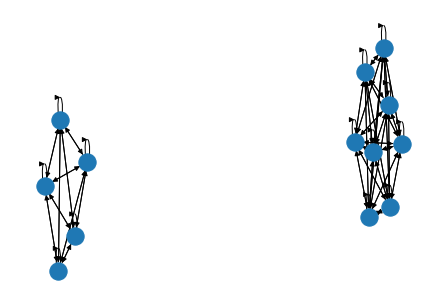

In [3]:
G = nx.disjoint_union_all([g.to_networkx() for g in graphs])
nx.draw(G)

In [4]:
import pandas as pd
from dgl.data import QM7bDataset
import networkx as nx
import dgl, tqdm
import numpy as np
dataset = QM7bDataset()

edges_s = []
edges_t = []
edge_data = []
graph_id = []
verts = []
labels = []
adjust = 0
for i in range(len(dataset)):
	g,l = dataset[i]
	if i>0:
		adjust += dataset[i-1][0].num_nodes()
	

	verts.extend(g.nodes().numpy() + adjust)
	labels.append('|'.join(str(x) for x in l.numpy()))
	labels.extend(['']*(g.num_nodes()-1))
	graph_id.extend([i]*g.nodes().shape[0])
	edges_s.extend(g.edges()[0].numpy() + adjust)
	edges_t.extend(g.edges()[1].numpy()+ adjust)
	h = g.edata['h'].numpy()[:,0]
	edge_data.extend(h)

verts_df = pd.DataFrame({'id': verts,'graph_id':graph_id,'label':labels})	
edges_df = pd.DataFrame({'src': edges_s, 'tgt': edges_t, 'h':edge_data})#,'graph_id':graph_id})
verts_df.to_csv('data/QM7B_vertices.csv', index=False)
edges_df.to_csv('data/QM7B_edges.csv', index=False)
edges_df

,src,tgt,h
0,0,0,36.858105
1,0,1,2.896123
2,0,2,2.896139
3,0,3,2.896083
4,0,4,2.896124
...,...,...,...
1766361,111179,111175,7.897262
1766362,111179,111176,16.271027
1766363,111179,111177,1.774575
1766364,111179,111178,1.092664


In [5]:
print(verts_df.head())
verts_df.loc[verts_df.label != '']

   id  graph_id                                              label
0   0         0  -420.93375|39.694626|0.62184143|-16.013|4.162|...
1   1         0                                                   
2   2         0                                                   
3   3         0                                                   
4   4         0                                                   


,id,graph_id,label
0,0,0,-420.93375|39.694626|0.62184143|-16.013|4.162|...
5,5,1,-718.4192|22.622486|0.62832844|-13.549|3.684|1...
13,13,2,-570.02484|22.94067|0.7090596|-10.16|1.231|7.1...
19,19,3,-410.28616|15.973799|2.2284796|-10.706|2.145|4...
23,23,4,-868.8554|17.900517|0.5561737|-12.365|3.825|10...
...,...,...,...
111115,111115,7206,-1109.601|10.914761|0.11700305|-10.697|-0.494|...
111126,111126,7207,-1343.5138|10.797283|0.7212072|-8.721|-0.004|3...
111139,111139,7208,-1330.1488|10.801065|0.8778793|-8.788|-0.117|3...
111152,111152,7209,-1355.4856|10.69714|0.6099017|-8.657|-0.191|3....


In [6]:
!scp data/QM7B_vertices.csv vm_name:/path/to/data
!scp data/QM7B_edges.csv vm_name:/path/to/data

*******************************************************************************
*                                                                             *
*  This is a private computer system containing confidential information.     *
*  Any unauthorized attempt to access or use this computer system or any      *
*  information on it by employees or other persons may result in termination  *
*  of employment, civil fines, and criminal penalties.  This system must be   *
*  used for authorized business purposes only.                                *
*                                                                             *
*******************************************************************************
QM7B_vertices.csv                             100% 2124KB   1.1MB/s   00:01    
*******************************************************************************
*                                                                             *
*  This is a private computer system con